## Uniform distribution

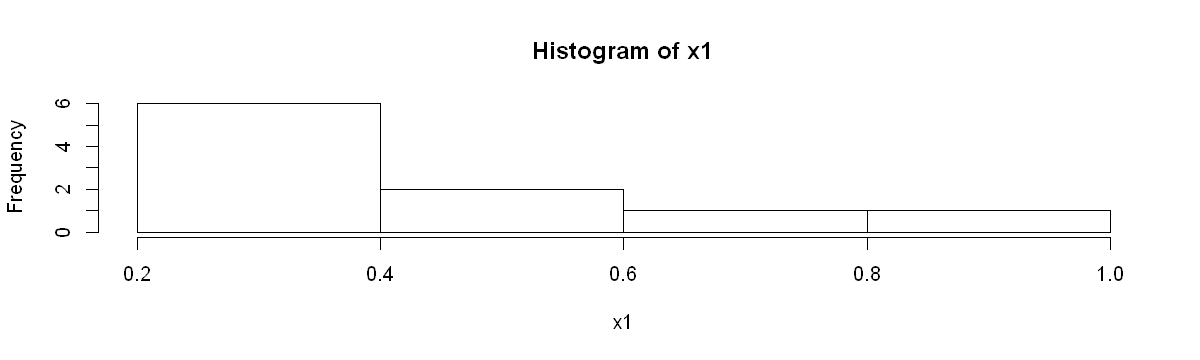

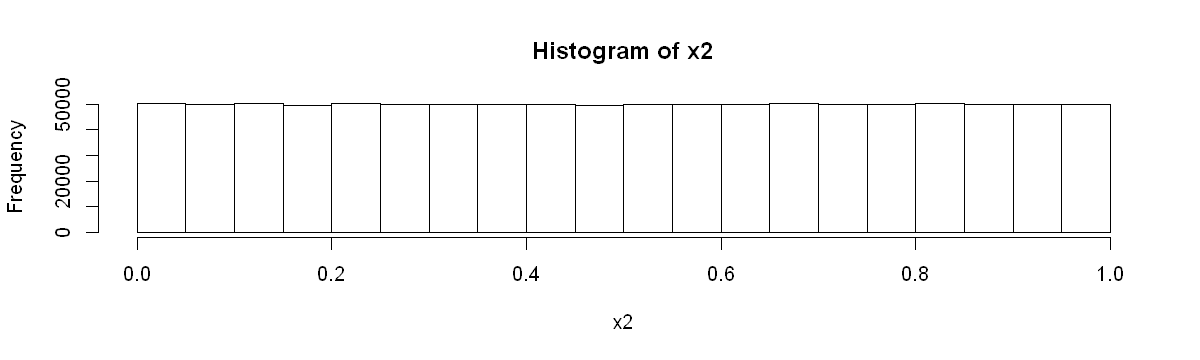

In [3]:
library(repr)
options(repr.plot.width=10, repr.plot.height=3)
x1<-runif(10)
x2<-runif(1000000)
hist(x1) 
hist(x2)

## Poisson Distribution

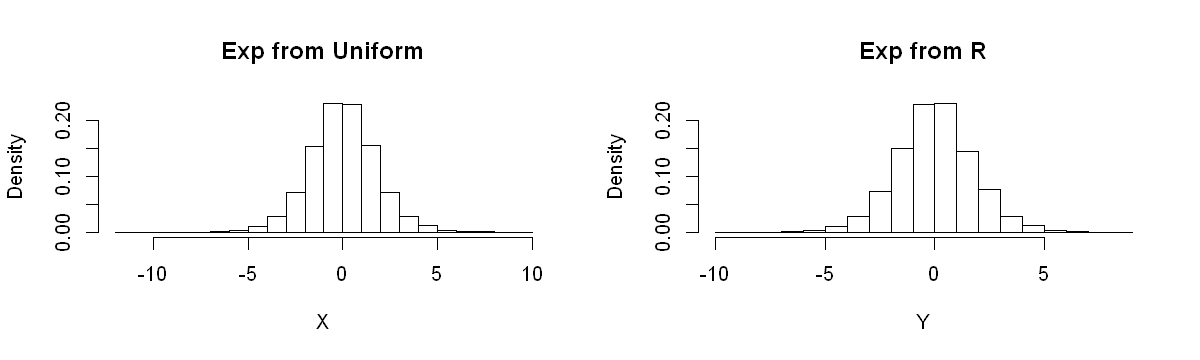

In [13]:
library(repr)
options(repr.plot.width=10, repr.plot.height=3)
NSim=10^4
U=runif(NSim)
X=-log(1/U-1)
Y=rlogis(NSim)
par(mfrow=c(1,2))
hist(X,freq=F,main="Exp from Uniform")
hist(Y, freq=F, main="Exp from R")

# Chisquare distributions
Summing up 3 exponential distribution gives chisquare distribution

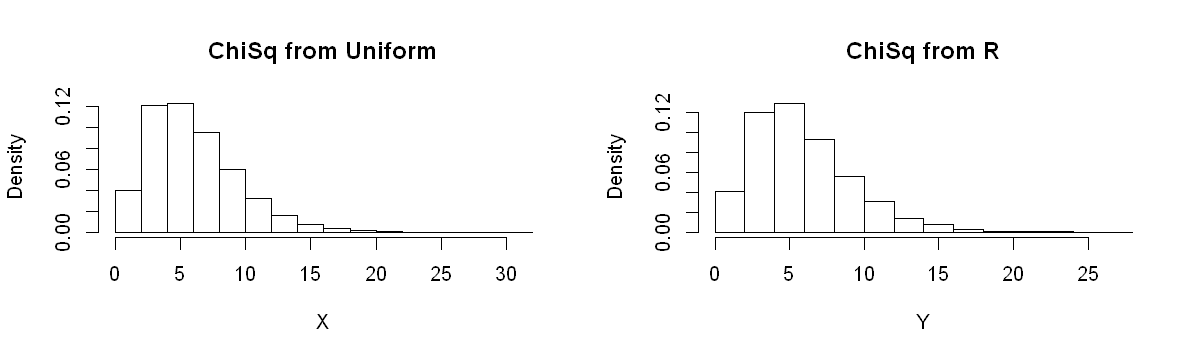

In [8]:
U=runif(3*10^4)
U=matrix(data=U, nrow=3) #matrix for sums
X=-log(U) #uniform to exponential
X=2*apply(X,2,sum) #sum up to get chisquares
Y=rchisq(10^4, 6)
par(mfrow=c(1,2))
hist(X,freq=F,main = "ChiSq from Uniform")
hist(Y,freq=F,main = "ChiSq from R") 

# Simulation

In [19]:
set.seed(123456) #Set the seed for reproducible results
b0<-.2 #True value for the intercept
b1<-.5 #True value for the slope
n<-1000 #Sample size
X<-runif(n,-1,1) #Create a sample of n obs on the ind var X
Y<-b0+b1*X+rnorm(n,0,1) #The true DGP, with N(0,1) error
model<-lm(Y~X) #Estimate OLS model
model$coefficients

(Intercept)           X 
  0.2025988   0.4388826

Suppose we want to see average of the parameters so lets iterate the process in a loop

In [22]:
set.seed(123456) #Set the seed for reproducible results
reps<-500 #Set the number of repetitions
par.est<-matrix(NA,nrow=reps,ncol=2) #Empty matrix to store the estimates
b0<-.2 #True value for the intercept
b1<-.5 #True value for the slope
n<-1000 #Sample size
X<-runif(n,-1,1) #Create a sample of n obs on the ind var X
for(i in 1:reps){ #Start the loop
Y<-b0+b1*X+rnorm(n,0,1) #The true DGP, with N(0,1) error
model<-lm(Y~X) #Estimate OLS model
par.est[i,1]<- model$coefficients[1] #Estimate of b0 in col 1
par.est[i,2]<- model$coefficients[2] #Estimate of b1 in col 2
}

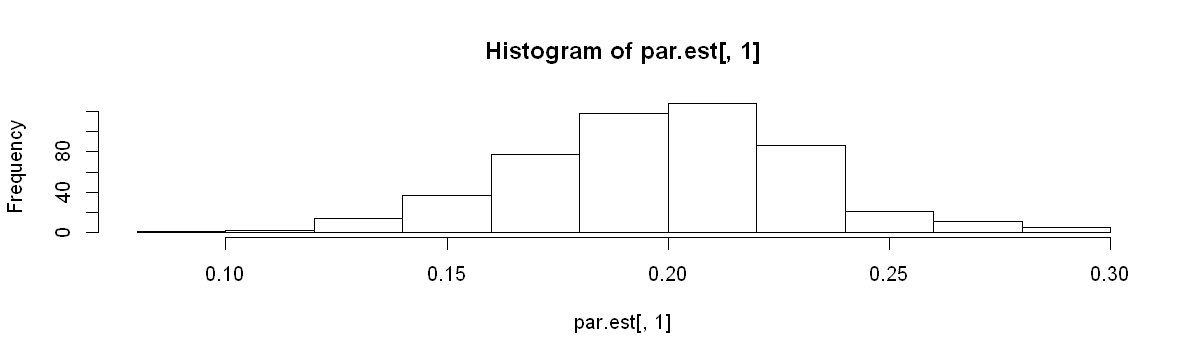

In [31]:
hist(par.est[,1], breaks = 10)

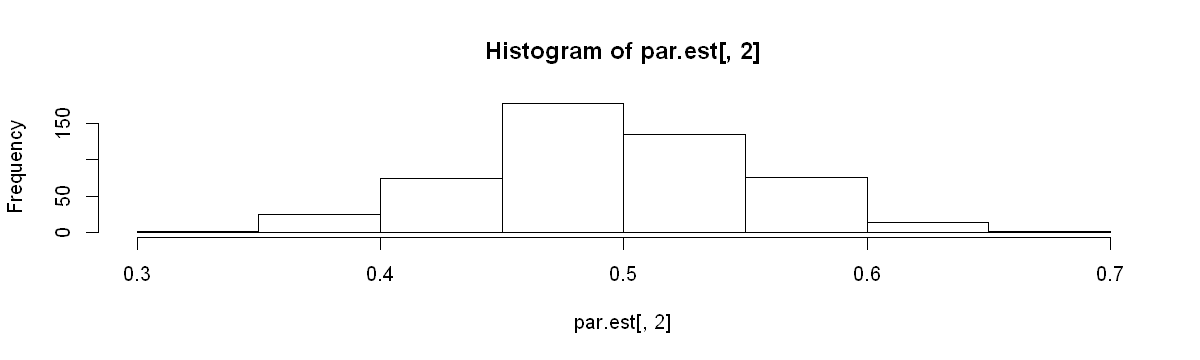

In [32]:
hist(par.est[,2], breaks = 10)

# Accept reject method

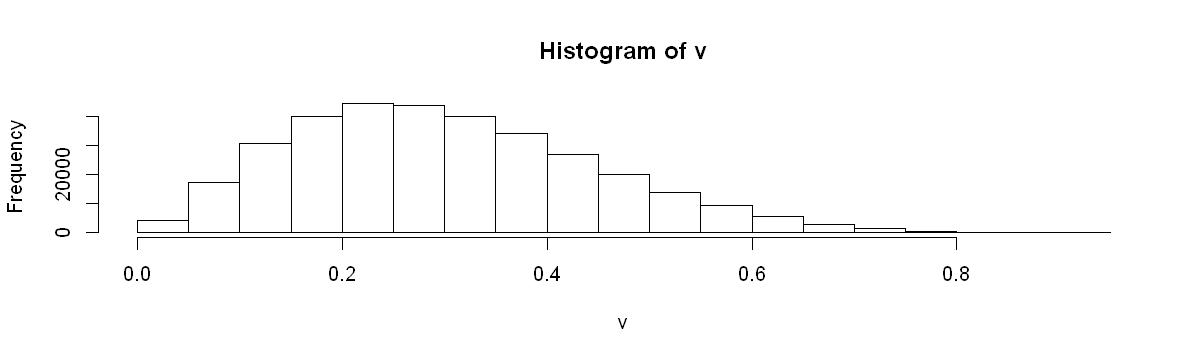

In [4]:
NSim=1000000
a=2.7; b=6.3
M=3
y=runif(NSim,max=M)
x=runif(NSim)
v=x[y<dbeta(x,a,b)]
hist(v)

# Permutation test scenario 

[1] 2.645602

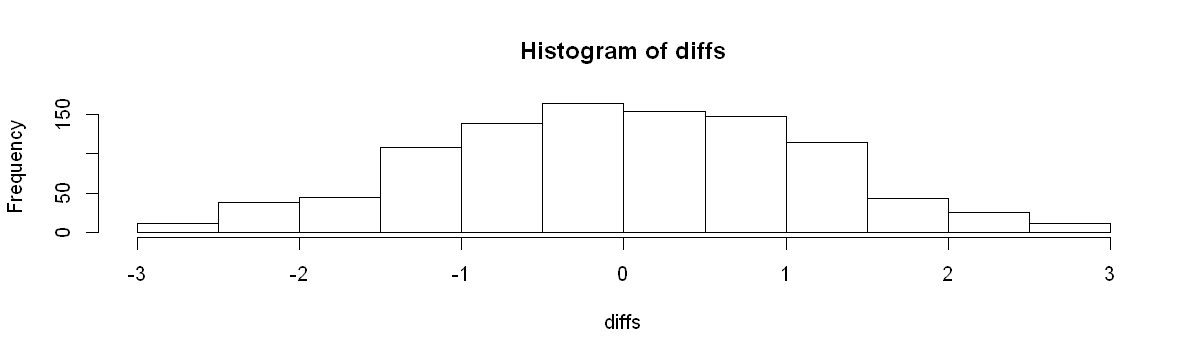

In [5]:
#Basic Randomization Test
set.seed(98383)
NSim<-1000 #Number of shuffles
N<-10 #Number of treated people
obs.treatment <-c(rep(1,5), rep(0,5)) #Treatment assignment
obs.y<-rnorm(N, mean=obs.treatment*3, sd =1) #The outcome variable
obs.data<-data.frame(obs.treatment, obs.y) #Put the data together
f1 <- function(x, n){ sum(head(x,n))} #function to add up n numbers in a vector x
#Difference in observed means in the original sample
diff.obs<-f1(obs.y,5)/5-(f1(obs.y,10)-f1(obs.y,5))/5
diffs<-rep(NA,NSim) #Vector to store difference-in-means
for (i in 1:NSim){
shuffled.labels<-sample(obs.treatment)
diffs[i]=mean(obs.y[shuffled.labels==1]) - mean(obs.y[shuffled.labels==0])
}
hist(diffs)
diff.obs

# Simple heterscedasticity simulation

First get to know the sigma of the heteroscedastic model so we can predetermine the sigma of the non heteroscedastic model that we are going to build in the next step

In [18]:
set.seed(100484)
reps <- 1000
#ncv non constant variance
par.est.ncv <- matrix(NA, nrow = reps, ncol =2) #empty matrix to store estimates
b0 <- 0.2 #true intercept
b1 <- 0.5 #true coefficient
n <- 1000
X <- runif(n,-1,1)
gamma <- 1.5 #heteroscedastictiy parameter
sigma.est<- numeric(reps)
for(i in 1:reps){
    Y <- b0 + b1* X+ rnorm(n,0,exp(gamma*X))
    model <- lm(Y~X)
    sigma.est[i] <- summary(model)$sigma #Storing the residual standard deviation
    par.est.ncv[i,1] <- model$coef[1]
    par.est.ncv[i,2] <- model$coef[2]
}
mean(sigma.est)

[1] 1.873242

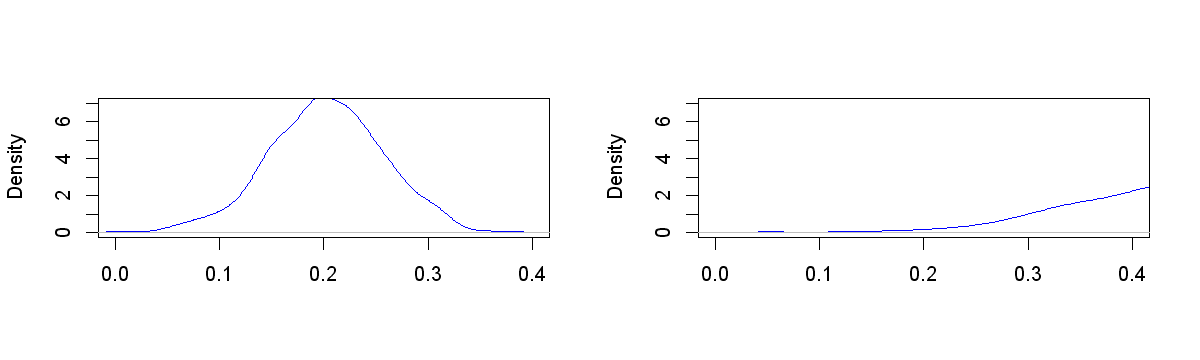

In [25]:
set.seed(100484)
reps <- 1000
#ncv non constant variance
par.est.ncv <- matrix(NA, nrow = reps, ncol =4) #empty matrix to store estimates
b0 <- 0.2 #true intercept
b1 <- 0.5 #true coefficient
n <- 1000
X <- runif(n,-1,1)
gamma <- 1.5 #heteroscedastictiy parameter
# sigma.est<- numeric(reps)
sigma <- 1.87
for(i in 1:reps){
    Y <- b0 + b1* X+ rnorm(n,0,sigma) #compare model without heteroscedasticity
    Y <- b0 + b1* X+ rnorm(n,0,exp(gamma*X)) #model with heteroscedasticity
    model <- lm(Y~X)
#     sigma.est[i] <- summary(model)$sigma #Storing the residual standard deviation
    par.est.ncv[i,1] <- model$coef[1]
    par.est.ncv[i,2] <- model$coef[2]
    par.est.ncv[i,3] <- model$coef[1]
    par.est.ncv[i,4] <- model$coef[2]    
}

par(mfrow = c(1,2))
plot(density(par.est.ncv[,1]),xlab = NA,xlim = c(0,0.4), ylim = c(0,7), main = "",col = "red")
par(new = TRUE)
plot(density(par.est.ncv[,3]),xlab = NA,xlim = c(0,0.4), ylim = c(0,7), main = "",col = "blue")

plot(density(par.est.ncv[,2]),xlab = NA,xlim = c(0,0.4), ylim = c(0,7), main = "",col = "red")
par(new = TRUE)
plot(density(par.est.ncv[,4]),xlab = NA,xlim = c(0,0.4), ylim = c(0,7), main = "",col = "blue")

Therefore we saw from the simulation that with heterscedasticity there will be effect on efficiency/variance but not on bias